# **Figure 8.** Machs
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 4/27/2022|

## Python Imports

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy import fftpack

## AB

### Saturation Morphology

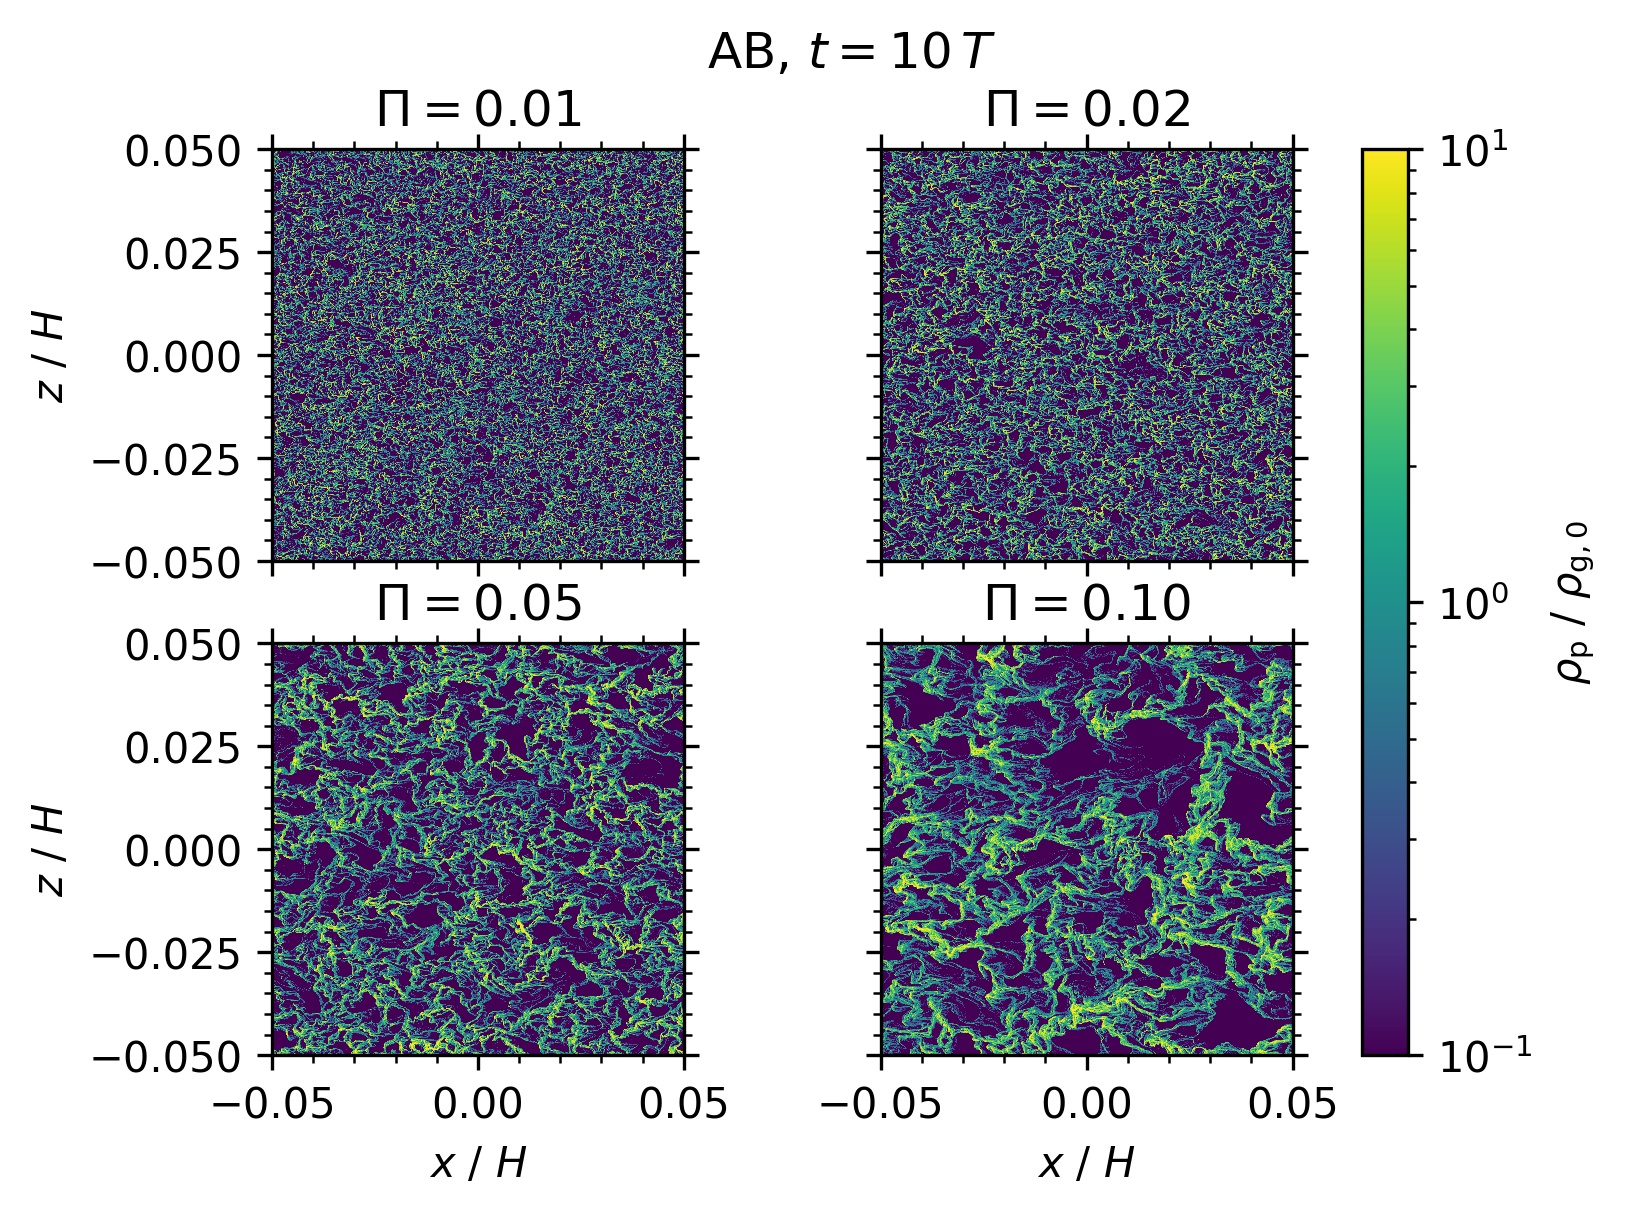

In [6]:
fig, axs = plt.subplots(2, 2, dpi=300)
Pis = ['0.01', '0.02', '0.05', '0.10']
vmin, vmax = 1e-1, 1e1 # CPDD > 85%; CPDD < 5%

for i,ax in enumerate(axs.flat):
    path = '../unstrat/AB/%s/2048/'%Pis[i]
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed'] # sound speed
    Omega = athinput['problem']['omega']       # local Keplerian angular frequency
    H = c_s/Omega                              # gas scale height
    T = 2*np.pi/Omega                          # orbital period
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    xf, zf = data['x1f']/H, data['x2f']/H
    clip = np.clip(data['rhop'][0], vmin, vmax)
    img = ax.pcolormesh(xf, zf, clip, norm=colors.LogNorm(vmin, vmax))
    ax.set(title=r'$\Pi={:s}$'.format(Pis[i]), aspect='equal',
           xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

fig.suptitle(r'AB, $t = {:.0f}\,T$'.format(data['Time']/T))
cb = fig.colorbar(img, ax=axs[:,:])
cb.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')

### Autocorrelation

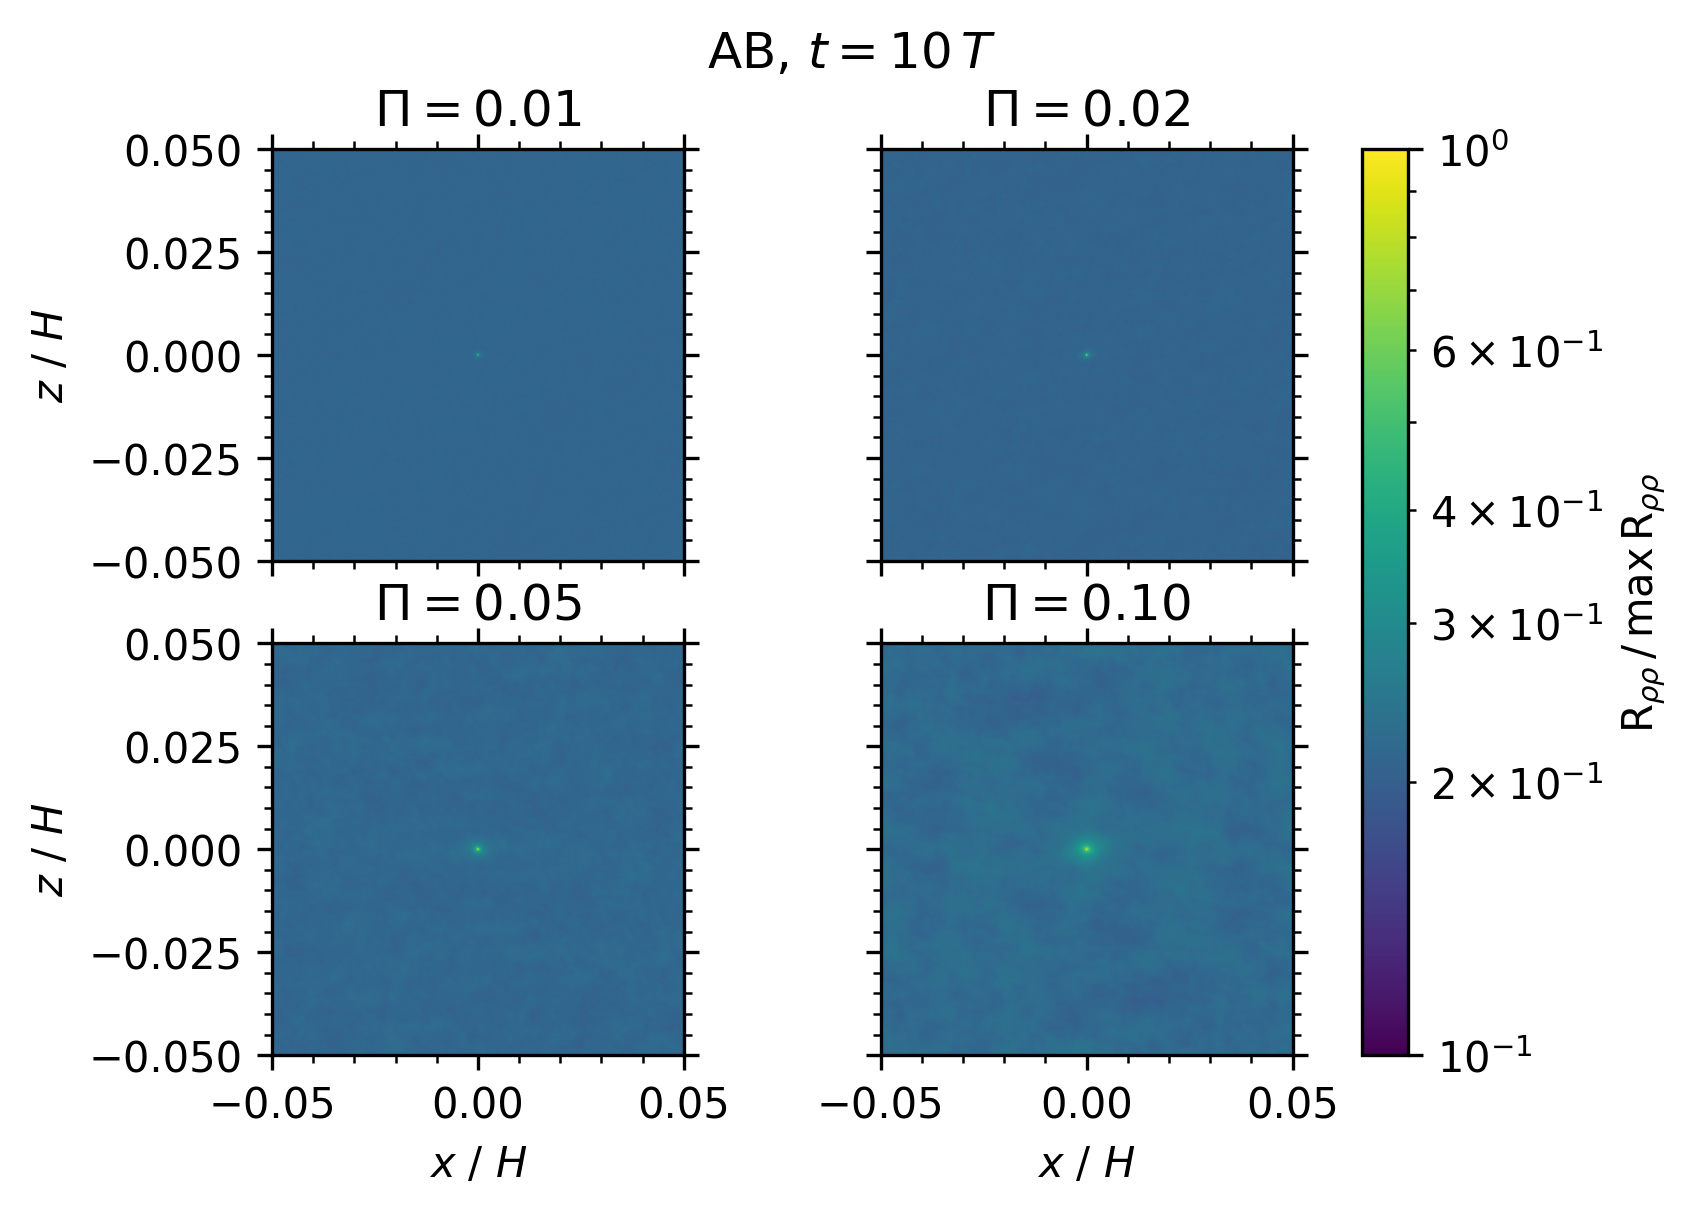

In [2]:
fig, axs = plt.subplots(2, 2, dpi=300)
Pis = ['0.01', '0.02', '0.05', '0.10']

for i,ax in enumerate(axs.flat):
    path = '../unstrat/AB/%s/2048/'%Pis[i]
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed'] # sound speed
    Omega = athinput['problem']['omega']       # local Keplerian angular frequency
    H = c_s/Omega                              # gas scale height
    T = 2*np.pi/Omega                          # orbital period
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    xf, zf = data['x1f']/H, data['x2f']/H
    dataFT = fftpack.fft2(data['rhop'][0])
    dataAC = fftpack.ifft2(dataFT*np.conjugate(dataFT)).real
    norm = dataAC/dataAC[0][0]
    shift = fftpack.fftshift(norm)
    img = ax.pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin=1e-1))
    ax.set(title=r'$\Pi={:s}$'.format(Pis[i]), aspect='equal',
           xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)
    # cb = fig.colorbar(img, ax=ax)
    # cb.set_label(r'$\mathrm{R}_{\rho\rho}\,/\,\max\,\mathrm{R}_{\rho\rho}$')

fig.suptitle(r'AB, $t = {:.0f}\,T$'.format(data['Time']/T))
cb = fig.colorbar(img, ax=axs[:,:])
cb.set_label(r'$\mathrm{R}_{\rho\rho}\,/\,\max\,\mathrm{R}_{\rho\rho}$')

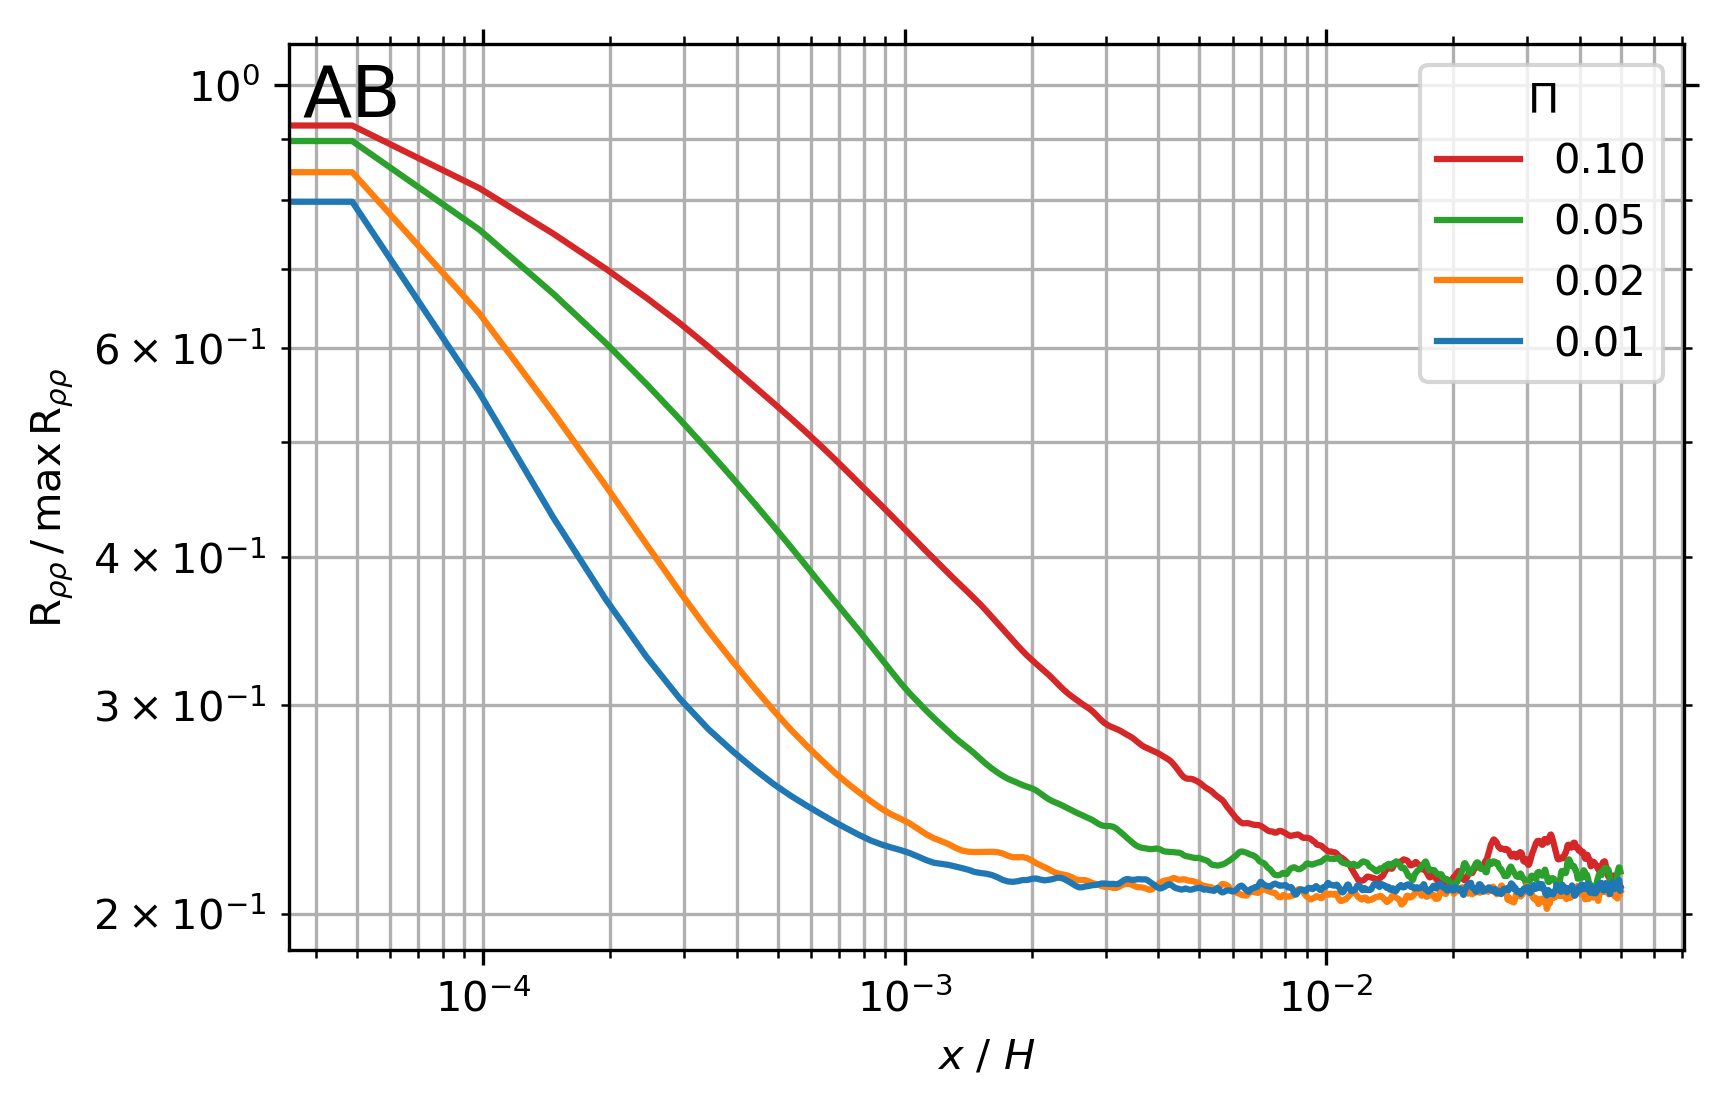

In [4]:
fig, ax = plt.subplots(dpi=300)
Pis = ['0.10', '0.05', '0.02', '0.01']
clrs = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue', ] # try reversing layers (z pos)?

for i,Pi in enumerate(Pis):
    path = '../unstrat/AB/%s/2048/'%Pi
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed'] # sound speed
    Omega = athinput['problem']['omega']       # local Keplerian angular frequency
    H = c_s/Omega                              # gas scale height
    T = 2*np.pi/Omega                          # orbital period
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    temp = fftpack.fft2(data['rhop'][0])
    temp = fftpack.ifft2(temp*np.conjugate(temp)).real
    Rmax = temp[0][0]
    temp = fftpack.fftshift(temp)[1024]/Rmax
    ax.loglog(data['x1f'][:-1]/H, temp, color=clrs[i], label=Pi)

ax.text(0.01, 0.98, 'AB', ha='left', va='top', size='xx-large',
                transform=ax.transAxes)
# t = r'$(t = {:.0f}\,T)$'.format(data['Time']/T)
ylabel = r'$\mathrm{R}_{\rho\rho}$'\
         +r'$\,/\,\max\,\mathrm{R}_{\rho\rho}$'
ax.grid(which='both')
ax.label_outer()
ax.legend(title=r'$\Pi$')
ax.minorticks_on()
ax.set(xlabel=r'$x$ / $H$', ylabel=ylabel)#, xlim=(0, 0.05), yscale='log')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.savefig('figs/radprof.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/radprof.png', bbox_inches='tight', pad_inches=0.01)